# Métodos de tiro
#### https://meet.google.com/itf-egnj-bti

Consideremos el PVF 
$$ -u''(t) = e^{t^2},\quad u(0)=u(1)=0.$$
Vamos a aproximar la solución aplicando métodos de tiro.

In [1]:
# Escribimos nuestra ecuación en forma de sistema u'=v, v'=-e^{t^2}
var('t,u,v')
eqns=[v,-exp(t^2)]

Sea $u(t,v_0)$ la solución de la ecuación diferencial determinada por las condiciones iniciales $u(0,v_0)=0$, $u'(0,v_0)=v_0$. 

Definimos $\phi(v_0)=u(1,v_0)$. Buscamos $v_0$ tal que $\phi(v_0)=0$, para lo que aplicaremos el método de la secante. Tomamos las condiciones iniciales $v_0=0$ y $v_0=1$.

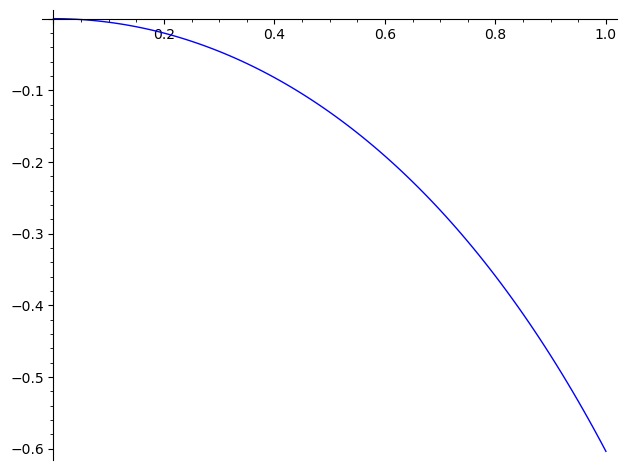

In [2]:
# Resolvemos el PVI u(0)=0, u'(0)=0
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,0],ivar=t,end_points=1,step=0.01)
line([(ti,ui) for ti,ui,vi in P])

In [4]:
# Sólo necesitamos el valor aproximado de u(1)
phi0=P[-1][1]
phi0

-0.6035108315286097

In [5]:
# Resolvemos el PVI u(0)=0, u'(0)=1
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,1],ivar=t,end_points=1,step=0.01)
# Sólo necesitamos el valor aproximado de u(1)
phi1=P[-1][1]
phi1

0.39648916847139

Ahora aplicamos un paso del método de la secante. Como el problema es lineal, sabemos que esto nos da la solución. 

In [6]:
# Calculamos x2 (que sabemos que es la condición inicial que queremos por ser el problema lineal)
v2 = -phi0/(phi1-phi0)
v2

0.6035108315286098

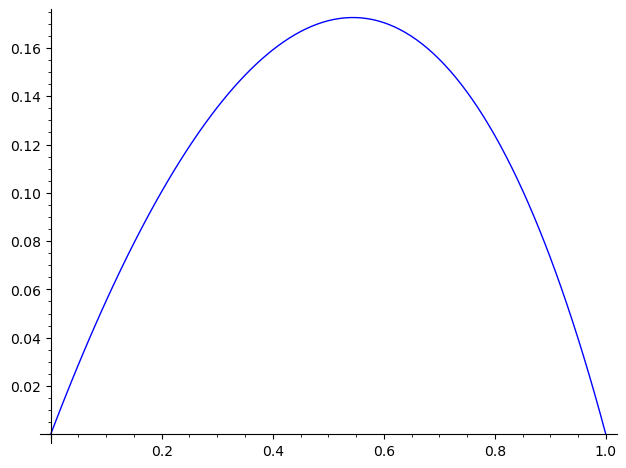

In [7]:
# Resolvemos el sistema para esa ecuación inicial y representamos la solución
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v2],ivar=t,end_points=1,step=0.01)
LP = line([ [i,j] for i,j,k in P])
LP

### Ejercicios

1. Aplicar el método anterior al PVF $$-u''(t) + u(t)=\cos(t),\quad u(0)=0,\ u(1)=0.$$
2. Aplicar el método anterior al PVF $$-u''(t) + u(t)=\cos(t),\quad u(0)=0,\ u(1)=1.$$
3. Consideremos el péndulo simple $u''+\sin(u)=0$, $u(0)=0$. Dicha ecuación tiene soluciones periódicas para cualquier periodo $T\geq 2\pi$. Fijemos el periodo $T=8$. Obtener una (la) solución que tiene dicho periodo (y que no es identicamente nula).  
4. Resolver el problema anterior aplicando el método de Taylor.
5. Consideremos el péndulo simple forzado $u'' + \sin(u) = \sin(4t/\pi)/2$ Obtener una solución que verifique las condiciones frontera $u(0)=u(4)=0$. Dibujar dicha solución para tiempos largos (40 o 100) para ver si es periódica.


In [51]:
def phi(eqns,v0,tf = 1,paso = 0.01):
    P = desolve_system_rk4(eqns,[u,v],ics=[0,0,v0],ivar=t,end_points=tf,step=paso)
    return P[-1][1]

In [52]:
# Escribimos nuestra ecuación en forma de sistema u'=v, v'=-e^{t^2}
var('t,u,v')
eqns=[v,u-cos(t)]

#### 1

In [53]:
phi0 = phi(eqns,0)
phi1 = phi(eqns,1)
v2 = -phi0/(phi1-phi0)
v2

0.4266411293452563

In [54]:
phi(eqns,v2)

-1.31405303305243e-16

#### 2

In [55]:
phi0 = phi(eqns,0.5)-1
phi1 = phi(eqns,0.9)-1
v2 = (0.5*phi1-0.9*phi0)/(phi1-phi0)
v2

1.27755925767710

In [56]:
phi(eqns,v2)

1.0

#### 3

In [63]:
# Escribimos nuestra ecuación en forma de sistema u'=v, v'=-e^{t^2}
var('t,u,v')
eqns=[v,-sin(u)]

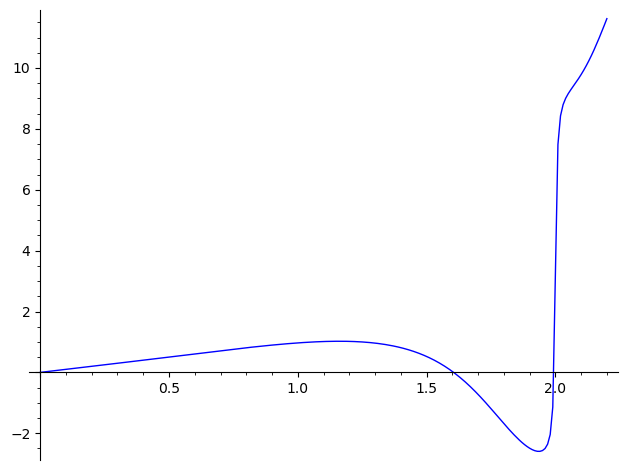

In [64]:
line([ ( v0 , phi(eqns,v0,tf=8,paso = 0.1) ) for v0 in [0, 0.01 .. 2.2]])

In [66]:
v0 = 1.6
phi0 = phi(eqns,v0,tf=8)
v1 = 1.65
phi1 = phi(eqns,v1,tf=8)
v2 = (v0*phi1-v1*phi0)/(phi1-phi0)
v2

1.60437770320389

In [67]:
phi2 = phi(eqns,v2,tf=8)
v3 = (v1*phi2-v2*phi1)/(phi2-phi1)
v3

1.60477394784642

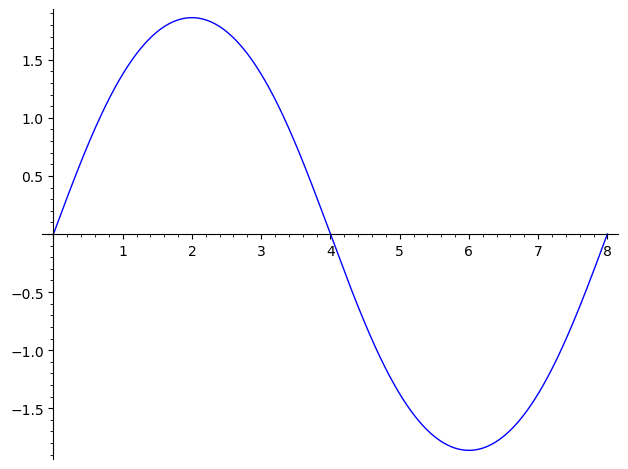

In [69]:
# Resolvemos el sistema para esa ecuación inicial y representamos la solución
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v3],ivar=t,end_points=8,step=0.01)
LP = line([ [i,j] for i,j,k in P])
LP

## Diferencias finitas

Consideremos el PVF 
$$ -u''(t) = e^{t^2},\quad u(0)=u(1)=0.$$
Vamos a aplicar ahora el método de las diferencias finitas.

In [ ]:
# Función que define los coeficientes del sistema
def a(i,j):
    if i==j:
        return 2
    if abs(i-j)==1:
        return -1
    else:
        return 0

In [ ]:
# Planteamos el sistema y lo resolvemos
N = 5
h = 1/(N+1)
A = h^-2*matrix([[a(i,j) for j in [1 .. N]] for i in [1 .. N]],sparse=true)
F = vector([exp((i*h)^2) for i in [1..N]]) 
show(A,F)

In [ ]:
# Resolvemos el sistema
ui=A.solve_right(F)
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')+LP

### Ejercicios

1. Aplicar el método de las diferencias finitas al problema anterior con 20, 50 y 100 pasos. 
2. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t) + t u(t)=2t+2,\quad u(0)=u(1)=0.$$ Nótese que en este caso hay que modificar la matriz del método. 
3. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t) + t u(t)=2t+2+2u^2,\quad u(0)=u(1)=0.$$ En este caso, hay que aplicar un método de punto fijo para resolver el sistema. 

#### 2

In [1]:
# Función que define los coeficientes del sistema
def a(i,j,h):
    if i==j:
        return 2/h^2 + i*h
    if abs(i-j)==1:
        return -1/h^2
    else:
        return 0

In [10]:
N = 50
h = 1/(N+1)
A = matrix( RDF, [ [ a(i,j,h) for j in [1 .. N] ] for i in [1 .. N] ], sparse=true)
F = vector([2*(i*h) + 2 for i in [1..N]]) 

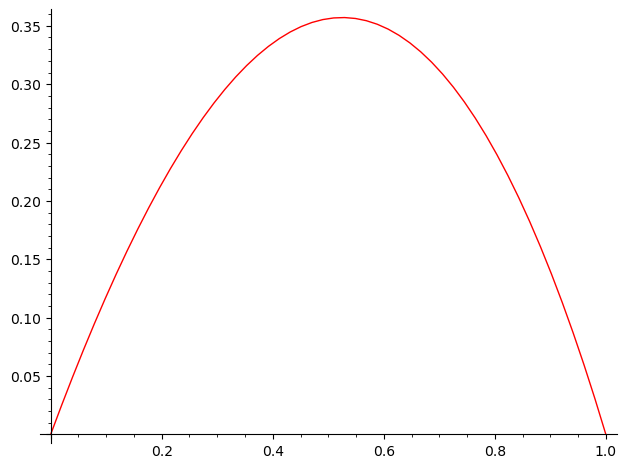

In [11]:
# Resolvemos el sistema
ui=A.solve_right(F)
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')

#### 3

In [30]:
# Función que define los coeficientes del sistema
def a(i,j,h):
    if i==j:
        return 2/h^2 + i*h
    if abs(i-j)==1:
        return -1/h^2
    else:
        return 0

In [31]:
N = 50
h = 1/(N+1)
A = matrix( RDF, [ [ a(i,j,h) for j in [1 .. N] ] for i in [1 .. N] ], sparse=true)
F = vector([2*(i*h) + 2 for i in [1..N]])

In [32]:
# Condición inicial
u0 = vector([0]*N)

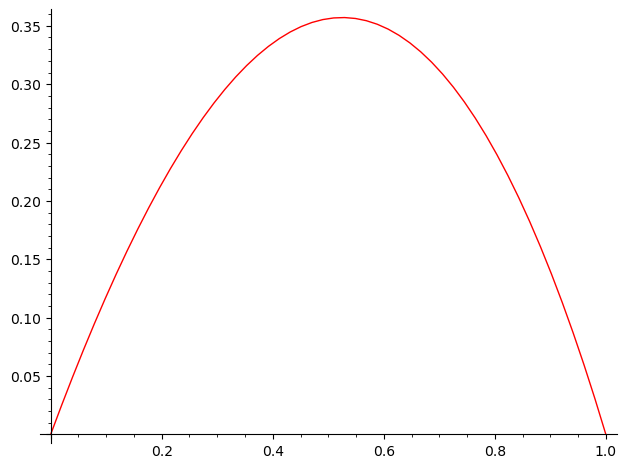

In [33]:
# Resolvemos el sistema
u1=A.solve_right(F + vector([2*k^2 for k in u0]))
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(u1)+[0]),color='red')

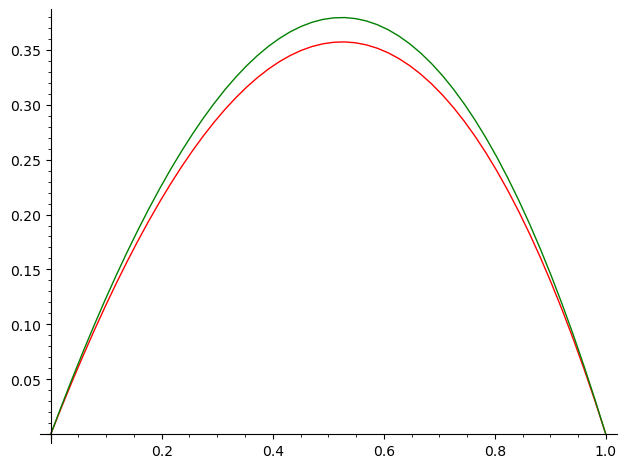

In [34]:
# Resolvemos el sistema
u2=A.solve_right(F + vector([2*k^2 for k in u1]))
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(u1)+[0]),color='red') + \
line(zip([i*h for i in [0..N+1]],[0]+list(u2)+[0]),color='green')

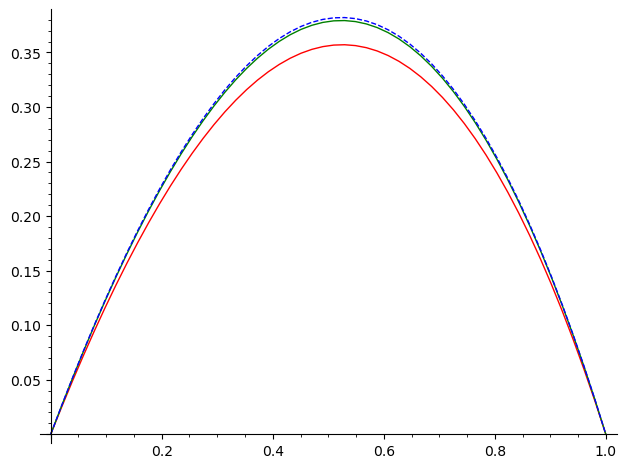

In [35]:
# Resolvemos el sistema
u3=A.solve_right(F + vector([2*k^2 for k in u2]))
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(u1)+[0]),color='red') + \
line(zip([i*h for i in [0..N+1]],[0]+list(u2)+[0]),color='green')+ \
line(zip([i*h for i in [0..N+1]],[0]+list(u3)+[0]),color='blue',linestyle='--')